<a href="https://colab.research.google.com/github/iptkachev/yda_crowdsourcing/blob/main/hw3/shad_cv_project_22/toloka_pool_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install -q toloka-kit==0.1.17 # To interact with Toloka API
!pip install -q ipyplot # To plot images inside Jupyter Notebooks cells
!pip install -q crowd-kit==0.0.7
!pip install -q yadisk
!pip3 install -q ipyplot timm pytorch_lightning

In [2]:
! curl https://tlk.s3.yandex.net/course/shad_cv_project_22/dataset_students.zip --output dataset_students.zip
! unzip -q dataset_students.zip
! curl https://tlk.s3.yandex.net/course/shad_cv_project_22/val.zip --output val.zip
! unzip -q val.zip
! mv val dataset_students/classification/
! git clone https://github.com/iptkachev/yda_crowdsourcing.git
! cd yda_crowdsourcing && git pull

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  400M  100  400M    0     0  18.9M      0  0:00:21  0:00:21 --:--:-- 19.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78.8M  100 78.8M    0     0  14.1M      0  0:00:05  0:00:05 --:--:-- 17.5M
Cloning into 'yda_crowdsourcing'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 90 (delta 36), reused 31 (delta 9), pack-reused 0
Unpacking objects: 100% (90/90), done.
Already up to date.


In [92]:
import os
import datetime
import time
import logging
import sys
import torch
import pandas as pd   # To perform data manipulation
import matplotlib.pyplot as plt
from IPython.display import clear_output

from typing import List
from toloka.streaming.event import AssignmentEvent

import toloka as tlk
import toloka.client as toloka
import toloka.client.project.template_builder as tb

from crowdkit.aggregation import MajorityVote
from crowdkit.aggregation import DawidSkene

src_path = "/content/yda_crowdsourcing/hw3/shad_cv_project_22"
if src_path not in sys.path:
    sys.path.append(src_path)

from src.model import ImageClassifier
from src.utils import ImagesDataset, evaluate_model_probs
from src.transforms import transform

logging.basicConfig(
    format='[%(levelname)s] %(name)s: %(message)s',
    level=logging.INFO,
    stream=sys.stdout,
)

In [93]:
import yadisk
y = yadisk.YaDisk(token=input())
clear_output()
print(y.check_token())

True


In [94]:
toloka_client = toloka.TolokaClient(input("Enter your token:"), 'PRODUCTION') # Or switch to 'SANDBOX'
print(toloka_client.get_requester())
clear_output()

# Upload images to disk

In [ ]:
ROOT = "dataset_students/classification/train_unlabelled"

for image in os.listdir(ROOT):
  y.upload(os.path.join(ROOT, image), f"disk:/Приложения/Toloka/project1_cv_copy/{image}")

# Upload tasks

In [98]:
uploaded_images = list(y.listdir("disk:/Приложения/Toloka/project1_cv_copy", timeout=100))
uploaded_images_names = sorted(list(map(lambda x: x['name'], uploaded_images)))

In [99]:
val_names = os.listdir("/content/dataset_students/classification/val")
print(len(uploaded_images_names))
uploaded_images_names = set(uploaded_images_names) - set(val_names)
print(len(uploaded_images_names))

4914
3359


In [100]:
model_path = "/content/yda_crowdsourcing/hw3/shad_cv_project_22/epoch=13-val_f1_score=0.35.ckpt"
model = ImageClassifier()
model.load_state_dict(torch.load(model_path))
model.eval()
clear_output()

In [101]:
predict_images_paths = [os.path.join('dataset_students/classification/train_unlabelled', fname) for fname in uploaded_images_names]
predict_dataset = ImagesDataset(predict_images_paths, transform=transform)
preds = evaluate_model_probs(model, predict_dataset)

  0%|          | 0/105 [00:00<?, ?it/s]

In [102]:
price = 0.008
limit_budget = 10
print(int(limit_budget / (price)))

1250


In [103]:
preds_df = pd.DataFrame({
    "prob": map(lambda x: x[1], preds[1]),
    "image_path": map(lambda x: x.split("/")[-1], predict_dataset.image_paths)
})

In [104]:
width = 0.49
to_label = preds_df[(preds_df['prob'].abs() >= 0.5 - width) & (preds_df['prob'].abs() <= 0.5 + width)]
print(to_label.shape)

(1515, 2)


7042.png


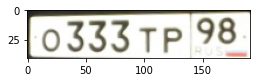

7268.png


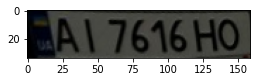

6411.png


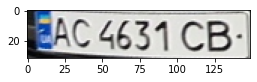

2837.png


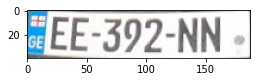

6957.png


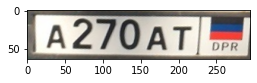

7845.png


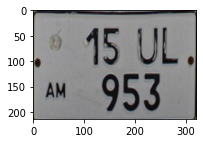

6556.png


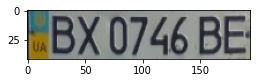

4976.png


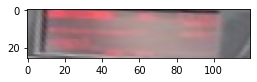

4592.png


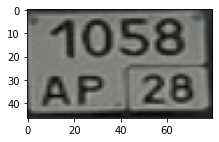

3895.png


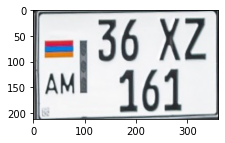

6972.png


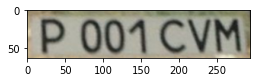

6752.png


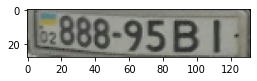

4740.png


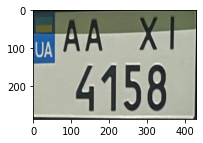

5538.png


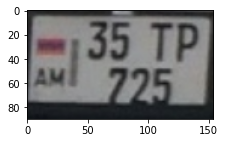

7085.png


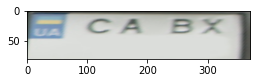

3817.png


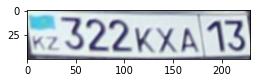

4599.png


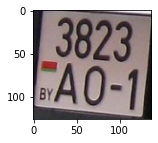

4852.png


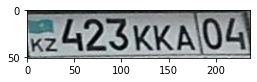

6712.png


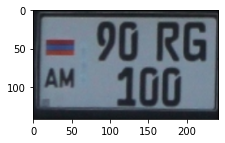

5479.png


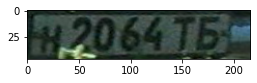

6879.png


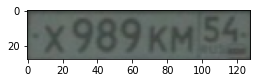

6320.png


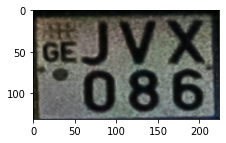

8229.png


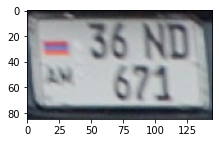

7595.png


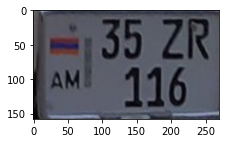

3217.png


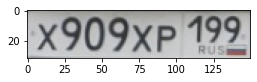

6295.png


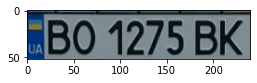

5648.png


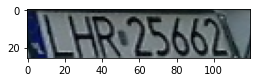

8327.png


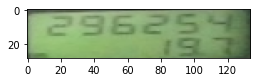

7760.png


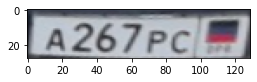

3457.png


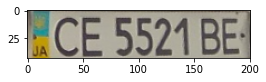

3839.png


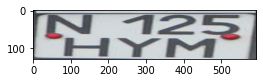

5295.png


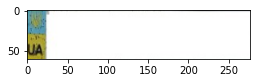

5619.png


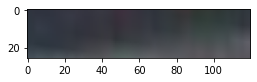

5386.png


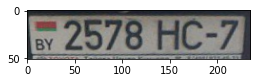

2767.png


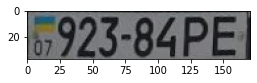

5432.png


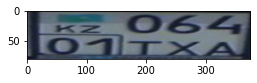

6521.png


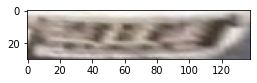

5188.png


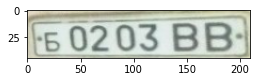

5391.png


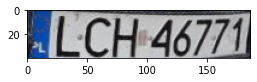

2938.png


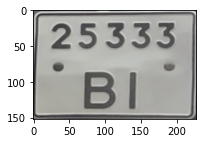

3349.png


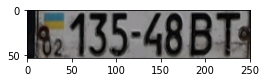

5406.png


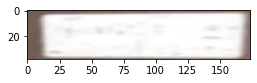

6058.png


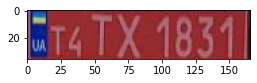

4271.png


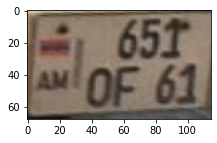

3905.png


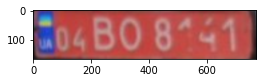

3671.png


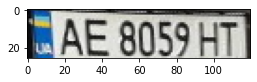

7354.png


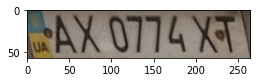

8012.png


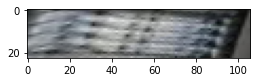

4999.png


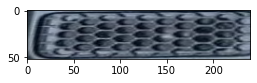

4285.png


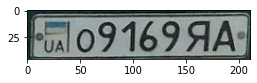

8068.png


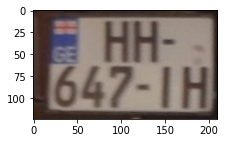

6200.png


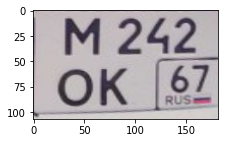

6817.png


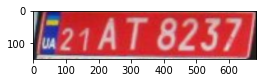

4821.png


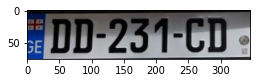

4049.png


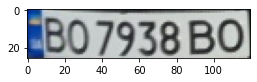

3968.png


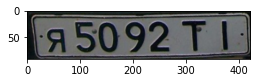

4322.png


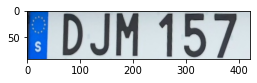

4796.png


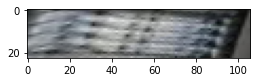

6362.png


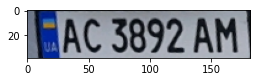

8111.png


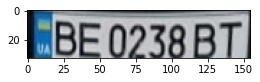

3876.png


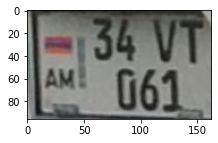

5857.png


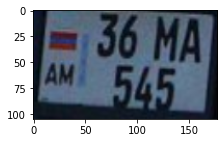

6212.png


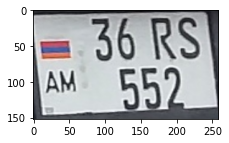

6509.png


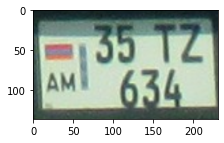

4183.png


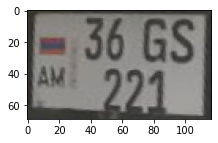

2920.png


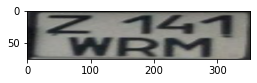

3879.png


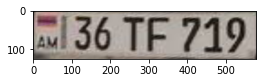

8456.png


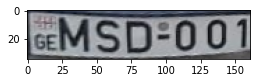

8172.png


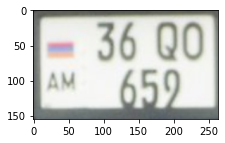

2950.png


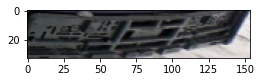

4102.png


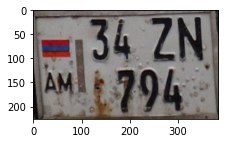

6889.png


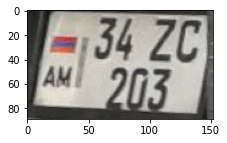

8351.png


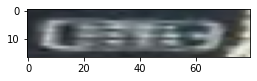

6579.png


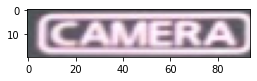

4724.png


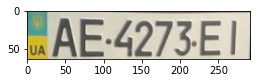

3129.png


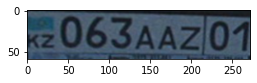

4132.png


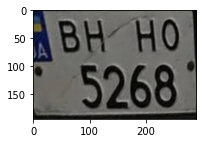

6748.png


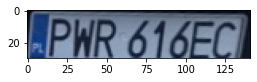

4651.png


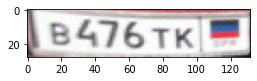

5609.png


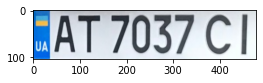

5530.png


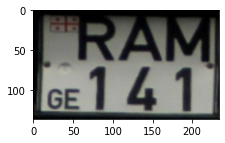

6897.png


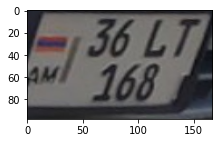

3728.png


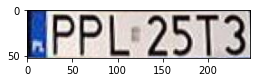

3695.png


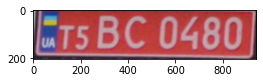

7656.png


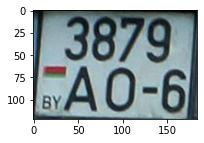

3539.png


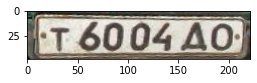

5685.png


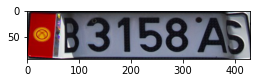

5362.png


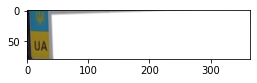

7323.png


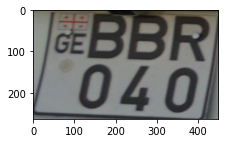

7093.png


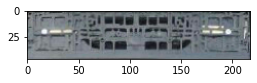

3054.png


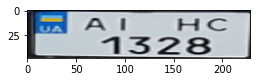

6071.png


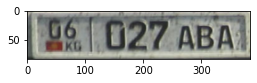

2809.png


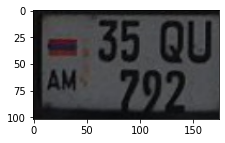

4772.png


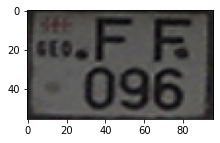

3279.png


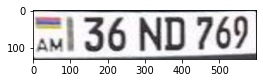

4850.png


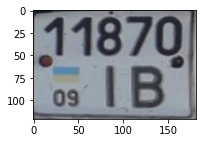

3024.png


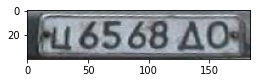

6195.png


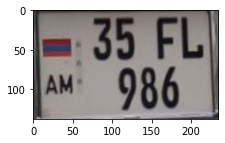

6773.png


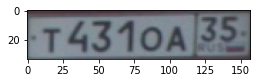

4138.png


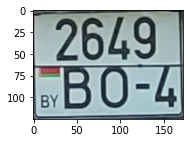

In [105]:
from skimage import io

for im in to_label.image_path[:100]:
  print(im)
  plt.figure(figsize = (4,2))
  plt.imshow(io.imread(os.path.join('dataset_students/classification/train_unlabelled', im)))
  plt.show()

26
7042.png


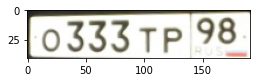

2837.png


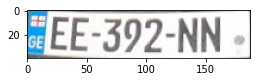

6957.png


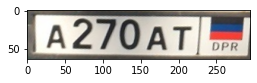

4592.png


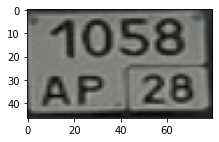

6879.png


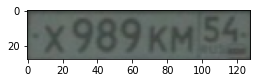

3217.png


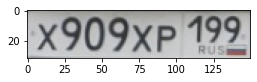

6200.png


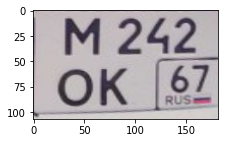

3024.png


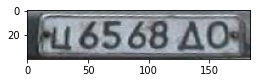

6773.png


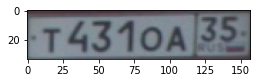

In [51]:
known = {
    "3984.png": "other",
    "4610.png": "other",
    "5890.png": "other",
    "2837.png": "other",

    "6957.png": "other",
    "2942.png": "other",
    "7456.png": "other",
    "4998.png": "other",
    "5323.png": "other",
    "3936.png": "other",
    "4922.png": "other",

    "4317.png": "other",
    "4847.png": "other",
    "7026.png": "other",
    "6090.png": "other",
    "3024.png": "other",

    "6773.png": "russian",
    "4592.png": "russian",
    "6879.png": "russian",
    "6200.png": "russian",
    "3217.png": "russian",
    "7042.png": "russian",
    "2894.png": "russian",
    "2924.png": "russian",
    "6186.png": "russian",
    "7684.png": "russian",
}
print(len(known))

from skimage import io

for im in to_label.image_path[:100]:
  if im in known:
    print(im)
    plt.figure(figsize = (4,2))
    plt.imshow(io.imread(os.path.join('dataset_students/classification/train_unlabelled', im)))
    plt.show()

In [106]:
pool = toloka.Pool(
    project_id=115282,
    # Give the pool any convenient name. You are the only one who will see it.
    private_name='Pool 4',
    may_contain_adult_content=False,
    # Set the price per task page.
    reward_per_assignment=0.02,
    will_expire=datetime.datetime.utcnow() + datetime.timedelta(days=365),
    # Overlap. This is the number of users who will complete the same task.
    defaults=toloka.Pool.Defaults(default_overlap_for_new_task_suites=3),
    # Time allowed for completing a task page
    assignment_max_duration_seconds=600,
)

In [107]:
pool.filter = toloka.filter.Languages.in_('RU')

In [108]:
pool.quality_control.add_action(
    collector=toloka.collectors.Income(),
    conditions=[toloka.conditions.IncomeSumForLast24Hours >= 20],
    action=toloka.actions.RestrictionV2(
        scope='PROJECT',
        duration=1,
        duration_unit='DAYS',
        private_comment='No need more answers from this performer',
    )
)

pool.quality_control.add_action(
    collector=toloka.collectors.SkippedInRowAssignments(),
    conditions=[toloka.conditions.SkippedInRowCount >= 10],
    action=toloka.actions.RestrictionV2(
        scope='PROJECT',
        duration=1,
        duration_unit='DAYS',
        private_comment='Lazy performer',
    )
)

pool.quality_control.add_action(
    collector=toloka.collectors.MajorityVote(answer_threshold=2, history_size=10),
    conditions=[
        toloka.conditions.TotalAnswersCount >= 3,
        toloka.conditions.CorrectAnswersRate < 75,
    ],
    action=toloka.actions.RestrictionV2(
        scope='PROJECT',
        duration=10,
        duration_unit='DAYS',
        private_comment='Too low quality',
    )
)

pool.quality_control.add_action(
    # Let's monitor fast submissions for the last 5 completed task pages
    # And define ones that take less than 20 seconds as quick responses.
    collector=toloka.collectors.AssignmentSubmitTime(history_size=5, fast_submit_threshold_seconds=20),
    # If we see more than one fast response, we ban the performer from all our projects for 10 days.
    conditions=[toloka.conditions.FastSubmittedCount > 1],
    action=toloka.actions.RestrictionV2(
        scope='ALL_PROJECTS',
        duration=10,
        duration_unit='DAYS',
        private_comment='Fast responses',  # Only you will see this comment
    )
)

pool.set_mixer_config(
    real_tasks_count=10,
    golden_tasks_count=0
)

In [109]:
pool = toloka_client.create_pool(pool)

In [90]:
training_pool = toloka_client.get_pool(35998934)
training_pool.defaults.default_overlap_for_new_task_suites = 0
training_pool.defaults.default_overlap_for_new_tasks = 0
training_tasks = [
    toloka.Task(input_values={'image': f'https://platform.toloka.ai/api/proxy/project1-cv-copy/{image}'}, pool_id=training_pool.id,overlap=1,
                known_solutions=[tlk.client.task.BaseTask.KnownSolution(output_values={"result": known.get(image)})],
                message_on_unknown_solution="look at project instruction")
    for image in to_label.image_path
    if known.get(image) is not None
]
toloka_client.create_tasks(training_tasks,)
clear_output()

In [111]:
tasks = [
    toloka.Task(input_values={'image': f'https://platform.toloka.ai/api/proxy/project1-cv-copy/{image}'}, pool_id=pool.id)
    for image in to_label.image_path
    if known.get(image) is None
]
toloka_client.create_tasks(tasks, allow_defaults=True)
# pool = toloka_client.open_pool(pool.id)

TaskBatchCreateResult(_unexpected={}, items={'0': Task(_unexpected={}, input_values={'image': 'https://platform.toloka.ai/api/proxy/project1-cv-copy/7268.png'}, known_solutions=None, message_on_unknown_solution=None, id='000225bbdb--63569ef1234ba92cc9a21005', infinite_overlap=False, overlap=3, pool_id='36027355', remaining_overlap=3, reserved_for=[], unavailable_for=[], traits_all_of=None, traits_any_of=None, traits_none_of_any=None, origin_task_id=None, created=datetime.datetime(2022, 10, 24, 14, 19, 29, 334000), baseline_solutions=None), '1': Task(_unexpected={}, input_values={'image': 'https://platform.toloka.ai/api/proxy/project1-cv-copy/6411.png'}, known_solutions=None, message_on_unknown_solution=None, id='000225bbdb--63569ef1234ba92cc9a21008', infinite_overlap=False, overlap=3, pool_id='36027355', remaining_overlap=3, reserved_for=[], unavailable_for=[], traits_all_of=None, traits_any_of=None, traits_none_of_any=None, origin_task_id=None, created=datetime.datetime(2022, 10, 24, 

In [98]:
to_label["GOLDEN:result"] = to_label.image_path.apply(lambda x: known.get(x, None))
to_label["INPUT:image"] = to_label.image_path.apply(lambda x: f'https://platform.toloka.ai/api/proxy/project1-cv-copy/{x}')
to_label[["GOLDEN:result", "INPUT:image"]].to_csv("control.tsv", index=False, sep="\t")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
detection_result = {}
for assignment in toloka_client.get_assignments(
    status='ACCEPTED',
    pool_id=pool.id
):
  print(assignment.solutions)
  break
    # detection_result[assignment.tasks[0].input_values['image']] = assignment.solutions[0].output_values['result']

[Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'}), Solution(output_values={'result': 'russian'})]


In [56]:
answers = []

answers_df = toloka_client.get_assignments_df(pool.id)
# prepare DataFrame
answers_df = answers_df.rename(columns={
    'INPUT:image': 'task',
    'OUTPUT:result': 'label',
    'ASSIGNMENT:worker_id': 'performer'
})

logging.info(f'answers count: {len(answers_df)}')

In [57]:
predicted_answers = MajorityVote().fit_predict(answers_df)
predicted_answers

task
https://platform.toloka.ai/api/proxy/project1-cv-copy/2642.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/2837.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/2852.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/2894.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/2924.png    _404
                                                                  ... 
https://platform.toloka.ai/api/proxy/project1-cv-copy/8018.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/8073.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/8119.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/8192.png    _404
https://platform.toloka.ai/api/proxy/project1-cv-copy/8411.png    _404
Length: 101, dtype: object

In [58]:
predicted_answers.to_frame().sort_values(0).tail(30)

,0
task,
https://platform.toloka.ai/api/proxy/project1-cv-copy/4745.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4922.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4713.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4346.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4695.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4995.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4629.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4847.png,_404
https://platform.toloka.ai/api/proxy/project1-cv-copy/4610.png,_404


In [ ]:
from crowdkit.aggregation import DawidSkene